# Predict prices of Houses

This Juypter notebook can be used to predict prices of houses.

## Load nr_dfs

We load the nr_dfs from the CSV (the trainingset and the test nr_df)

In [621]:
# Package for linear regressions


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_log_error

In [622]:
# Import pandas
import pandas as pd

In [623]:
train_url = '/home/sleroy/git/ml/houses/train.csv'
test_url = '/home/sleroy/git/ml/houses/test.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)


In [624]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [625]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1201 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             91 non-null     object 
 7   LotShape          1460 non-null   object 
 8   LandContour       1460 non-null   object 
 9   Utilities         1460 non-null   object 
 10  LotConfig         1460 non-null   object 
 11  LandSlope         1460 non-null   object 
 12  Neighborhood      1460 non-null   object 
 13  Condition1        1460 non-null   object 
 14  Condition2        1460 non-null   object 
 15  BldgType          1460 non-null   object 
 16  HouseStyle        1460 non-null   object 


In [626]:
feature_cols = train.columns[1:-1]
feature_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'Feature1stFlrSF', 'Feature2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

## Extract the features from the categories


In [627]:
# you want all rows, and the feature_cols' columns
train_X = train.loc[:, feature_cols]
test_X = test

In [628]:
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [629]:
train_y =  np.log(train.loc[:, ["SalePrice"] ])


In [630]:
train_y.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


## Now we are going to normalize the data

We have X as the feature dataframe and y as the label dataframe

In [631]:
# Import ydata for data profiling
from ydata_profiling import ProfileReport

In [632]:
profile = ProfileReport(train, title="DataProfile")

In [633]:
#profile.to_notebook_iframe()

In [634]:
#profile.to_file("books_data.html")

### Handling missing values

We are going to handle the missing values; column by column

In [635]:
# check for missing values
print(train.isnull())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [636]:
# List empty columns
print("Empty columns in training set", train_X.columns[train_X.isnull().any()])

Empty columns in training set Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [637]:
def normalize_dataset(dataset: pd.DataFrame):
    null_columns = dataset.columns[dataset.isnull().any()]
    assert null_columns.empty != True, "we should have null columns"
    # Copy before normalization
    nr_df = dataset.copy()    
    
    # Replace missing values with the mean of the column since the values are relatively balanced
    nr_df['LotFrontage'] = nr_df['LotFrontage'].fillna(nr_df['LotFrontage'].median()) 

    # MasVnrArea (59% of zero, 8 missing values; I put zero instead)
    nr_df['MasVnrArea'] = nr_df['MasVnrArea'].fillna(0) 

    nr_df['Utilities'] = nr_df['Utilities'].fillna('NA') 

    nr_df['BsmtFinSF1'] = nr_df['BsmtFinSF1'].fillna(nr_df['BsmtFinSF1'].median()) 
    nr_df['BsmtFinSF2'] = nr_df['BsmtFinSF2'].fillna(nr_df['BsmtFinSF2'].median()) 
    nr_df['BsmtUnfSF'] = nr_df['BsmtUnfSF'].fillna(nr_df['BsmtUnfSF'].median()) 
    nr_df['TotalBsmtSF'] = nr_df['TotalBsmtSF'].fillna(nr_df['TotalBsmtSF'].median()) 
    nr_df['GarageCars'] = nr_df['GarageCars'].fillna(nr_df['GarageCars'].median()) 
    nr_df['GarageYrBlt'] = nr_df['GarageYrBlt'].fillna(nr_df['GarageYrBlt'].median()) 
    nr_df['BsmtFullBath'] = nr_df['BsmtFullBath'].fillna(nr_df['BsmtFullBath'].median()) 
    nr_df['BsmtHalfBath'] = nr_df['BsmtHalfBath'].fillna(nr_df['BsmtHalfBath'].median()) 
    nr_df['GarageArea'] = nr_df['GarageArea'].fillna(nr_df['GarageArea'].median()) 
                
    ## Proposed new features
    nr_df['HasPool'] = nr_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['Has2ndFloor'] = nr_df['Feature2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['HasGarage'] = nr_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['HasBsmt'] = nr_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['HasFireplace'] = nr_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    nr_df['BltSoldYrDiff'] = nr_df['YrSold'].astype(np.int64) - nr_df['YearBuilt']
    nr_df['TotalSF'] = nr_df['TotalBsmtSF'] + nr_df['Feature1stFlrSF'] + nr_df['Feature2ndFlrSF']
    nr_df['TotalBathr'] = nr_df['FullBath'] + 0.5 * nr_df['HalfBath'] + nr_df['BsmtFullBath'] + 0.5 * nr_df['BsmtHalfBath']
    nr_df['TotalPorchSF'] = nr_df['OpenPorchSF'] + nr_df['Feature3SsnPorch'] + nr_df['EnclosedPorch'] + nr_df['ScreenPorch'] + nr_df['WoodDeckSF']    
            
    nr_df['YearBuilt'].apply(str)
    nr_df['YearRemodAdd'].apply(str)
                            
    # Random values with normalized proportion
    colnames = ['GarageFinish', 
                'GarageQual', 
                'GarageCond', 
                'Fence', 
                'MiscFeature', 
                'PoolQC', 
                'GarageType', 
                'FireplaceQu', 
                'Electrical', 
                'BsmtFinType2', 
                'BsmtFinType1', 
                'BsmtExposure', 
                'BsmtCond', 
                'BsmtQual', 
                'MasVnrType', 
                'Alley',
                'MSZoning', 
                'Exterior1st', 
                'Exterior2nd', 
                'KitchenQual', 
                'Functional', 
                'SaleType']
    for col in colnames:
        normCol =  nr_df[col].value_counts(normalize=True)
        #nr_df[col] = nr_df[col].fillna(pd.Series(np.random.choice(normCol.index, 
        #                                                p=normCol.tolist(), size=len(nr_df)))) 
        nr_df[col] = nr_df[col].fillna("NA")
    
    
    null_columns = nr_df.columns[nr_df.isnull().any()]
    assert null_columns.empty == True, "we should NOT have null columns" + null_columns
   
    
    ##nr_df.columns[nr_df.isnull().any()]
    return nr_df

In [638]:
train_norm_X_df = normalize_dataset(train_X)
test_norm_X_df = normalize_dataset(test_X)



In [639]:

# Convert features with categories into numbers
featureWithStrings = train_norm_X_df.select_dtypes(include=['object']).columns

for col in featureWithStrings:
    try:
        enc = LabelEncoder()
        mcol = pd.concat([train_norm_X_df[col], test_norm_X_df[col]])
        enc.fit(mcol)
        #print(mcol.info())
        train_norm_X_df[col] = enc.transform(train_norm_X_df[col])
        test_norm_X_df[col] = enc.transform(test_norm_X_df[col])
    except Exception as error:
        print("Exception with the column " + col)
    
    

## Check correlations with variables

We will output some graphs to check the correlations between the features and the price



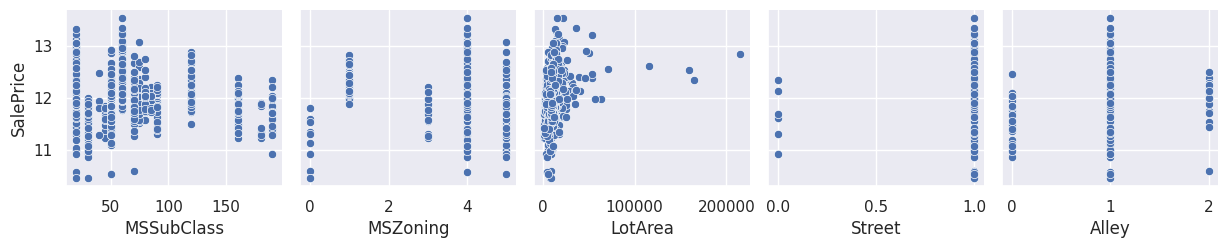

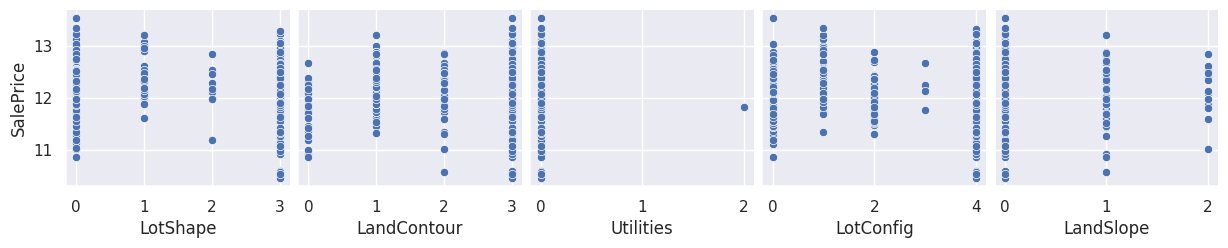

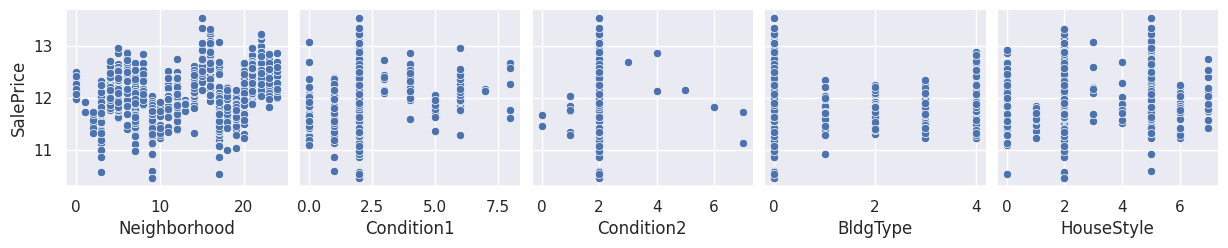

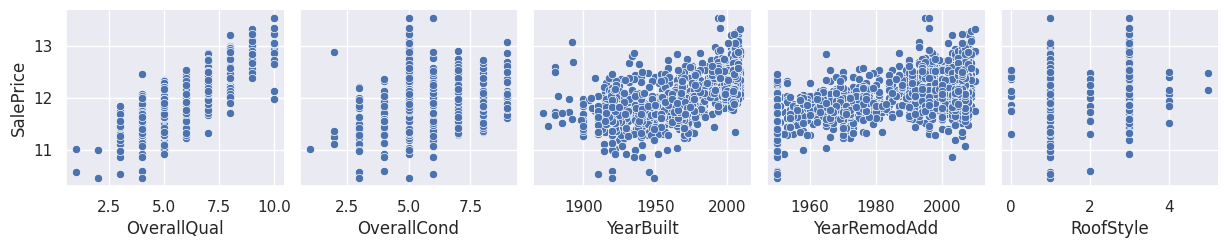

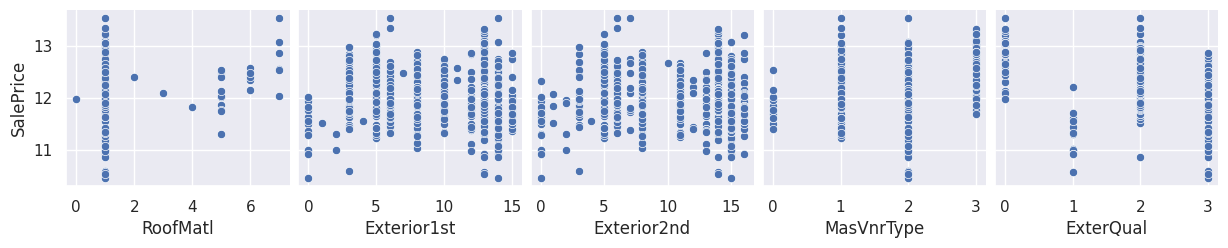

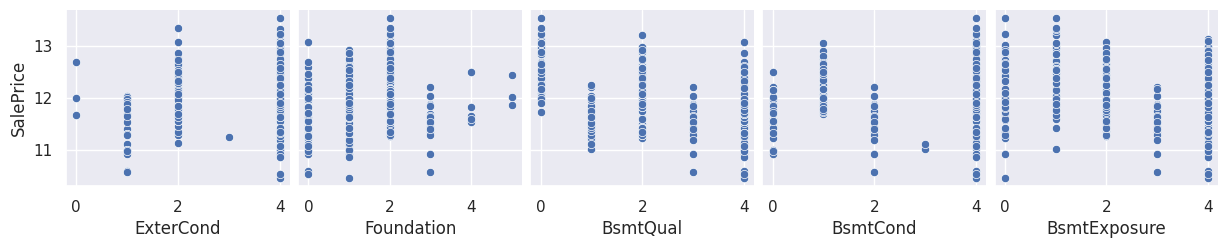

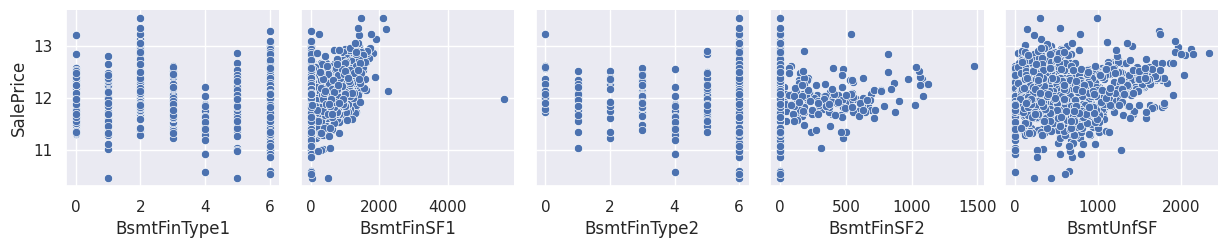

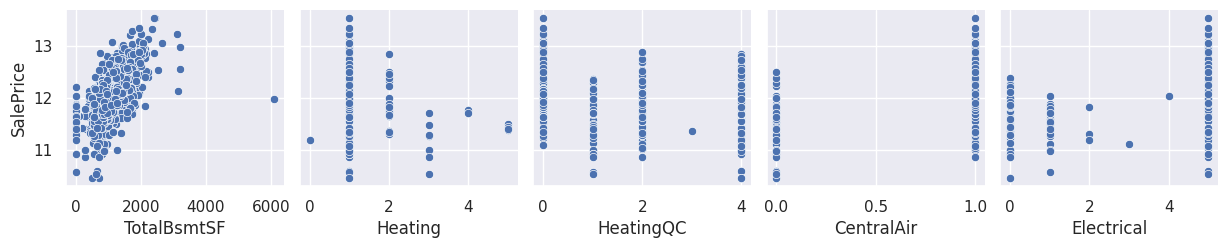

In [641]:
numeric_features = train_norm_X_df.select_dtypes(include=['int64']).columns

visu_df = train_norm_X_df.copy()
visu_df["SalePrice"] = train_y
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[:5])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[5:10])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[10:15])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[15:20])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[20:25])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[25:30])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[30:35])
sns.pairplot(data=visu_df, y_vars=['SalePrice'], x_vars=numeric_features[35:40])

## Entrainement du modèle

Nous allons utiliser linearReg et faire un split 0.8 / 0.2 pour choisir les meilleures features

In [650]:

from sklearn.linear_model import Ridge, BayesianRidge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR


def fit_model(retainedColumns: list, X, y):
    cat_selector = make_column_selector(dtype_include=object)
    num_selector = make_column_selector(dtype_include=np.number)
    cat_selector(X)


    cat_tree_processor = OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1,
        encoded_missing_value=-2,
    )
    num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

    cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
    num_linear_processor = make_pipeline(
        StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
    )

    linear_preprocessor = make_column_transformer(
        (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
    )


    tree_preprocessor = make_column_transformer(
        (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
    )
    lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
    

    rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
    
    gbdt_pipeline = make_pipeline(
        tree_preprocessor, HistGradientBoostingRegressor(random_state=0)
    )
    
    knn_pipeline = make_pipeline(
        linear_preprocessor, KNeighborsRegressor()
    )

    estimators = [
        ("Random Forest", rf_pipeline),
        ("LassoCV", lasso_pipeline),
        ("Gradient Boosting", gbdt_pipeline),
        ("KNN", knn_pipeline),   
        ("DecisionTreeRegressor", make_pipeline(tree_preprocessor, DecisionTreeRegressor())),
        ("LR", make_pipeline(linear_preprocessor, LinearRegression())),   
        ("XGB", make_pipeline(linear_preprocessor, XGBRegressor())),   
        ("LGBM", make_pipeline(linear_preprocessor, LGBMRegressor())),   
        ("SVR", make_pipeline(linear_preprocessor, SVR())),   
        ('Ridge', make_pipeline(linear_preprocessor, Ridge(alpha=10))),
        ('Lasso', make_pipeline(linear_preprocessor, Lasso(alpha=0.003487))),
        ('ENet', make_pipeline(linear_preprocessor, ElasticNet(alpha=0.006974)))
    ]
    train_normalized_retained_X = X[retainedColumns]
    stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
    stacking_regressor.fit(train_normalized_retained_X, y)
    return stacking_regressor


def build_model(retainedColumns: list, x, y):
    train_normalized_retained_X = x[retainedColumns]

    model = "bayes"
    if model == "linear":
        # Create linear regression object
        regr = LinearRegression()

        # Train the model using the training sets
        regr.fit(train_normalized_retained_X,y)
        return regr
    elif model == "ridge":
        clf = Ridge(alpha=1.0, solver = 'auto')
        # Train the model using the training sets
        clf.fit(train_normalized_retained_X,y)
        return clf        
    elif model == "svm":
        regr = svm.SVR()
        regr.fit(train_normalized_retained_X,y)
        return regr
    elif model == "linear_svm":
        regr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5))
        regr.fit(train_normalized_retained_X,y)
        return regr
    elif model == "bayes":
        clf = Ridge(alpha=1.0, solver = 'auto')
        # Train the model using the training sets
        clf.fit(train_normalized_retained_X,y)
        return clf        


## Faire une prédiction

We do not know which are the best features or I am lazy; so I am going to apply a generic algorithm to pick the bests.

In [651]:
import pygad


split_features_X_df, valid_features_X_df = train_test_split(train_norm_X_df, test_size=0.3, shuffle=False)
split_categ_y_df, valid_categ_y_df = train_test_split(train_y, test_size=0.3, shuffle=False)

columns = split_features_X_df.columns[1: ]
print(columns)


def fitness_func(ga_instance, solution, solution_idx):
    
    retained_columns = []
    #print("Solution " , solution)
    index = 0
    for val in solution:
        if val >= 0.5:
           retained_columns.append(columns[index])             
        index = index + 1
    #print("Retained columns", retained_columns)
    
    model = fit_model(retained_columns, split_features_X_df, split_categ_y_df )
    
    ## Compute Accuracys
    y_pred = model.predict(valid_features_X_df[retained_columns])
    y_test = valid_categ_y_df
    # The coefficients
    #print("Coefficients: \n", model.coef_)
    # The mean squared error
    print("root_mean_squared_log_error: %.2f" % root_mean_squared_log_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    print("Coefficient of determination / r2score: %.2f" % r2)
    #print(f1_score(y_test, y_pred, average="macro"))
    return r2

# First iteration
array = np.ones(len(columns)) 
fitness_func(None, array, None)    


Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Feature1stFlrSF', 'Feature2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3665
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 80
[LightGBM] [Info] Start training from score 12.026764


In [ ]:

fitness_function = fitness_func

num_generations = 10
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(columns)

init_range_low = 0
init_range_high = 1

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)


ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.83


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.82


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.80


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.83


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.83


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.83


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.84


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.82


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.86


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.85


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination / r2score: 0.87
Parameters of the best solution : [ 1.09424434  0.64159186  0.90805024  0.33891447  0.89082177  0.66111018
  0.92608384  0.10987684  0.99443041  0.64322631  1.62287753  1.17636782
  0.8162922   0.97673362  0.83497516  0.37144984  0.86571393  0.70049784
  0.44369349  0.32285996  0.61006497  0.24431177  0.93017151  0.81790634
  0.37957324  0.92759539  1.04179546  1.42566591  0.91097583  0.46189043
  0.01722959  0.48614227  0.73469954  0.49625833  0.92588202  1.37952941
  0.21846585  0.7337074   0.39605105 -0.05138233  2.09052715  0.02561474
  0.13495042  0.10114358  0.5708993   0.25742929  0.62601684  0.39437522
  0.68510227  0.89857877  0.26362172  1.46413966  0.29737379  0.54435568
  0.00376802  0.93221562  0.95141567  0.38073933  1.95138662  0.85464498
  0.308417    1.920133    0.30689627  0.31877261 -0.30678513 -0.03090832
  0.22681747 -0.737823    0.48028399  1.01022166  0.17931463  1.2565276
  0.61281015

In [ ]:
retained_columns = []

index = 0
for val in solution:
    if val >= 0.5:
        retained_columns.append(columns[index])     
    index = index + 1        
print("We use ", len(retained_columns), " the columns are ", retained_columns)
regr = fit_model(retained_columns,  train_norm_X_df[retained_columns], train_y )
        
test_normalized_retained_X = test_norm_X_df[retained_columns]
house_y_pred = regr.predict(test_normalized_retained_X)
# Add predictions to the DataFrame
test['SalePrice'] = np.exp(house_y_pred)

submission_df = test[['Id', 'SalePrice']]  # Adjust column names as needed
submission_df.to_csv('submission.csv', index=False)


We use  44  the columns are  ['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'Electrical', 'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'PoolArea', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


root_mean_squared_log_error: 0.01
Coefficient of determination: 0.97


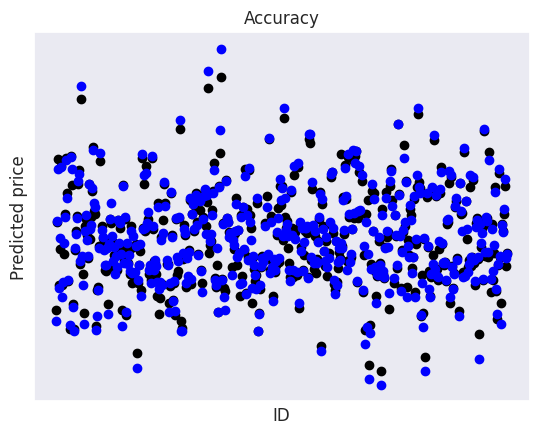

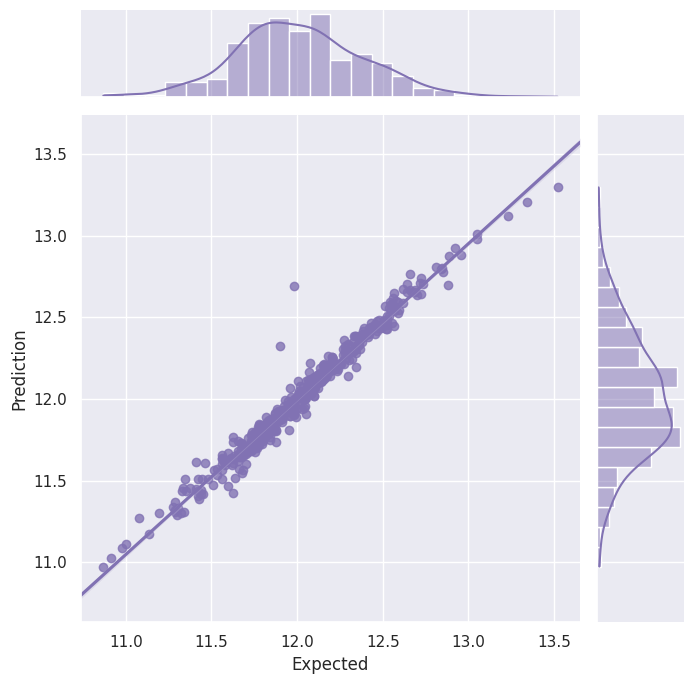

In [ ]:
## Compute Accuracy
y_pred = regr.predict(valid_features_X_df[retained_columns])
y_test = valid_categ_y_df
    

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("root_mean_squared_log_error: %.2f" % root_mean_squared_log_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(valid_features_X_df.index, y_pred, color="black")
plt.scatter(valid_features_X_df.index, y_test, color="blue")
#plt.scatter(train["Id"], y_test, color="blue")
#plt.plot(test_features_X_df,  test_predicted_Y_df, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.tick_params(axis='both', labelsize=12, width=2, length=5)  # Style

plt.xlabel('ID')
plt.ylabel('Predicted price')
plt.title('Accuracy')
plt.show()


sns.set_theme(style="darkgrid")

data = valid_features_X_df.copy()
data["Prediction" ] = y_pred
data["Expected" ] = y_test
data["id"] = data.index
g = sns.jointplot(x="Expected", y="Prediction", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)
